## Chapter 15 Practice Samantha Cress

## 15.3 Case Study: Classification with k-Nearest Neighbors and the Digits Dataset, Part 2

In [64]:
import pandas as pd

In [65]:
%matplotlib inline

In [66]:
from scipy import stats

In [67]:
import seaborn as sns

In [68]:
!pip install scikit-learn

In [69]:
import sklearn as sklearn

In [70]:
from sklearn.datasets import load_digits

In [71]:
digits = load_digits()

In [72]:
print(digits.DESCR)
_digits_dataset

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

NameError: name '_digits_dataset' is not defined

In [ ]:
digits.target[::100]

In [73]:
digits.data.shape

(1797, 64)

In [74]:
digits.target.shape

(1797,)

In [75]:
digits.images[13]

array([[ 0.,  2.,  9., 15., 14.,  9.,  3.,  0.],
       [ 0.,  4., 13.,  8.,  9., 16.,  8.,  0.],
       [ 0.,  0.,  0.,  6., 14., 15.,  3.,  0.],
       [ 0.,  0.,  0., 11., 14.,  2.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 15., 11.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  2., 15.,  4.,  0.],
       [ 0.,  1.,  5.,  6., 13., 16.,  6.,  0.],
       [ 0.,  2., 12., 12., 13., 11.,  0.,  0.]])

In [76]:
digits.data[13]

array([ 0.,  2.,  9., 15., 14.,  9.,  3.,  0.,  0.,  4., 13.,  8.,  9.,
       16.,  8.,  0.,  0.,  0.,  0.,  6., 14., 15.,  3.,  0.,  0.,  0.,
        0., 11., 14.,  2.,  0.,  0.,  0.,  0.,  0.,  2., 15., 11.,  0.,
        0.,  0.,  0.,  0.,  0.,  2., 15.,  4.,  0.,  0.,  1.,  5.,  6.,
       13., 16.,  6.,  0.,  0.,  2., 12., 12., 13., 11.,  0.,  0.])

In [77]:
digits.images[22]

array([[ 0.,  0.,  8., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  1., 13., 11., 16.,  0.,  0.,  0.],
       [ 0.,  0., 10.,  0., 13.,  3.,  0.,  0.],
       [ 0.,  0.,  3.,  1., 16.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  9., 12.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 15.,  5.,  0.,  0.,  0.],
       [ 0.,  0., 14., 15.,  8.,  8.,  3.,  0.],
       [ 0.,  0.,  7., 12., 12., 12., 13.,  1.]])

In [78]:
digits.target[22]

2

In [79]:
import matplotlib.pyplot as plt

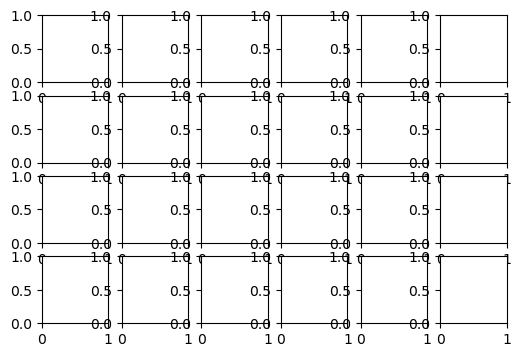

In [80]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(6, 4))

In [81]:
for item in zip(axes.ravel(), digits.images, digits.target):
    ...:     axes, image, target = item
    ...:     axes.imshow(image, cmap=plt.cm.gray_r)
    ...:     axes.set_xticks([]) # remove x-axis tick marks
    ...:     axes.set_yticks([]) # remove y-axis tick marks
    ...:     axes.set_title(target)
    ...: plt.tight_layout()

<Figure size 640x480 with 0 Axes>

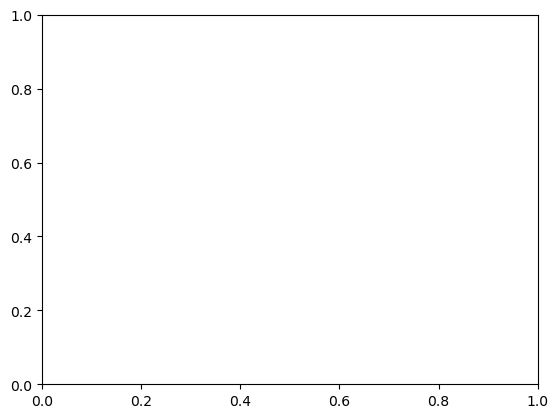

In [82]:
axes = plt.subplot()

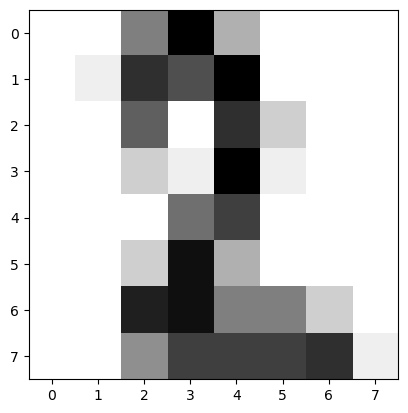

In [83]:
image = plt.imshow(digits.images[22], cmap=plt.cm.gray_r)

In [84]:
xticks = axes.set_xticks([])

In [85]:
yticks = axes.set_yticks([])

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X_train, X_test, y_train, y_test = train_test_split(
   ...: digits.data, digits.target, random_state=11)

In [88]:
X_train.shape

(1347, 64)

In [89]:
 X_test.shape

(450, 64)

In [90]:
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, random_state=11, test_size=0.20)

In [91]:
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size=0.40)

In [92]:
from sklearn.neighbors import KNeighborsClassifier

In [93]:
knn = KNeighborsClassifier()

In [94]:
knn.fit(X=X_train, y=y_train)

KNeighborsClassifier()

In [95]:
predicted = knn.predict(X=X_test)

In [96]:
expected = y_test

In [97]:
predicted[:20]

array([1, 2, 2, 1, 9, 6, 3, 7, 8, 7, 7, 1, 0, 8, 3, 5, 9, 5, 5, 6])

In [98]:
expected[:20]

array([1, 2, 2, 1, 9, 5, 3, 7, 8, 7, 7, 1, 0, 8, 3, 5, 9, 5, 5, 6])

In [99]:
wrong = [(p, e) for (p, e) in zip(predicted, expected) if p != e]

In [100]:
wrong

[(6, 5),
 (7, 4),
 (8, 4),
 (8, 6),
 (1, 8),
 (7, 3),
 (7, 4),
 (7, 3),
 (1, 8),
 (3, 8)]

In [101]:
print(f'{(len(expected) - len(wrong)) / len(expected):.2%}')

98.61%


In [102]:
wrong = []

## 15.3 Case Study: Classification with k-Nearest Neighbors and the Digits Dataset, Part 2

In [103]:
print(f'{knn.score(X_test, y_test):.2%}')

98.61%


In [104]:
from sklearn.metrics import confusion_matrix

In [105]:
confusion = confusion_matrix(y_true=expected, y_pred=predicted)

In [106]:
confusion

array([[84,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 81,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 72,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 76,  0,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0, 65,  0,  0,  2,  1,  0],
       [ 0,  0,  0,  0,  0, 66,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 63,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 71,  0,  0],
       [ 0,  2,  0,  1,  0,  0,  0,  0, 59,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 72]], dtype=int64)

In [107]:
from sklearn.metrics import classification_report

In [108]:
names = [str(digit) for digit in digits.target_names]

In [109]:
print(classification_report(expected, predicted,
   ...:        target_names=names))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       0.98      1.00      0.99        81
           2       1.00      1.00      1.00        72
           3       0.99      0.97      0.98        78
           4       1.00      0.96      0.98        68
           5       1.00      0.99      0.99        67
           6       0.98      0.98      0.98        64
           7       0.95      1.00      0.97        71
           8       0.97      0.95      0.96        62
           9       1.00      1.00      1.00        72

    accuracy                           0.99       719
   macro avg       0.99      0.99      0.99       719
weighted avg       0.99      0.99      0.99       719



In [110]:
confusion_df = pd.DataFrame(confusion, index=range(10),
    ...: columns=range(10))

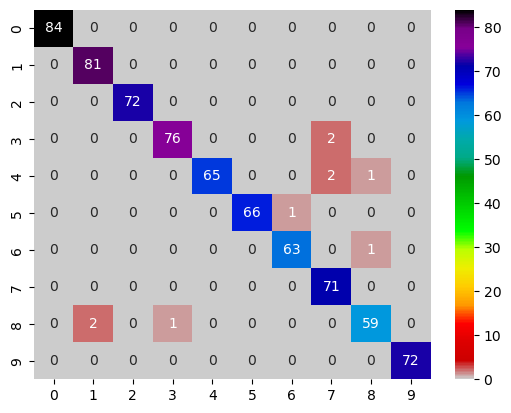

In [111]:
axes = sns.heatmap(confusion_df, annot=True,
    ...: cmap='nipy_spectral_r')

In [112]:
from sklearn.model_selection import KFold

In [113]:
kfold = KFold(n_splits=10, random_state=11, shuffle=True)

In [114]:
from sklearn.model_selection import cross_val_score

In [115]:
scores = cross_val_score(estimator=knn, X=digits.data,
    ...: y=digits.target, cv=kfold)

In [116]:
scores

array([0.97777778, 0.99444444, 0.98888889, 0.97777778, 0.98888889,
       0.99444444, 0.97777778, 0.98882682, 1.        , 0.98324022])

In [118]:
print(f'Mean accuracy: {scores.mean():.2%}')

Mean accuracy: 98.72%


In [119]:
print(f'Accuracy standard deviation: {scores.std():.2%}')

Accuracy standard deviation: 0.75%


In [120]:
from sklearn.svm import SVC

In [121]:
from sklearn.naive_bayes import GaussianNB

In [122]:
estimators = {
    ...:    'KNeighborsClassifier': knn,
    ...:    'SVC': SVC(gamma='scale'),
    ...:    'GaussianNB': GaussianNB()}

In [123]:
for estimator_name, estimator_object in estimators.items():
...:      kfold = KFold(n_splits=10, random_state=11, shuffle=True)
...:      scores = cross_val_score(estimator=estimator_object,
...:          X=digits.data, y=digits.target, cv=kfold)
...:      print(f'{estimator_name:>20}: ' +
...:          f'mean accuracy={scores.mean():.2%}; ' +
...:          f'standard deviation={scores.std():.2%}')

KNeighborsClassifier: mean accuracy=98.72%; standard deviation=0.75%
                 SVC: mean accuracy=98.72%; standard deviation=0.79%
          GaussianNB: mean accuracy=84.48%; standard deviation=3.47%


In [124]:
for k in range(1, 20, 2):
    ...:      kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    ...:      knn = KNeighborsClassifier(n_neighbors=k)
    ...:      scores = cross_val_score(estimator=knn,
    ...:          X=digits.data, y=digits.target, cv=kfold)
    ...:      print(f'k={k:<2}; mean accuracy={scores.mean():.2%}; ' +
    ...:            f'standard deviation={scores.std():.2%}')

k=1 ; mean accuracy=98.83%; standard deviation=0.58%
k=3 ; mean accuracy=98.83%; standard deviation=0.72%
k=5 ; mean accuracy=98.72%; standard deviation=0.75%
k=7 ; mean accuracy=98.44%; standard deviation=0.96%
k=9 ; mean accuracy=98.39%; standard deviation=0.80%
k=11; mean accuracy=98.33%; standard deviation=0.90%
k=13; mean accuracy=97.89%; standard deviation=0.89%
k=15; mean accuracy=97.89%; standard deviation=1.02%
k=17; mean accuracy=97.50%; standard deviation=1.00%
k=19; mean accuracy=97.66%; standard deviation=0.96%


## 15.4 Case Study: Time Series and Simple Linear Regression

In [125]:
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

In [126]:
nyc.columns = ['Date', 'Temperature', 'Anomaly']

In [127]:
nyc.Date = nyc.Date.floordiv(100)

In [128]:
nyc.Date = nyc.Date.floordiv(100)

In [129]:
nyc.head(3)

,Date,Temperature,Anomaly
0,18,34.2,-3.2
1,18,34.7,-2.7
2,18,35.5,-1.9


In [130]:
from sklearn.model_selection import train_test_split

In [131]:
X_train, X_test, y_train, y_test = train_test_split(
   ...:     nyc.Date.values.reshape(-1, 1), nyc.Temperature.values,
   ...:     random_state=11)

In [132]:
 X_train.shape

(93, 1)

In [133]:
X_test.shape

(31, 1)

In [134]:
from sklearn.linear_model import LinearRegression

In [135]:
linear_regression = LinearRegression()

In [137]:
linear_regression.fit(X=X_train, y=y_train)


LinearRegression()

In [143]:
linear_regression.coef_

array([1.48389423])

In [142]:
linear_regression.intercept_

9.271874999999987

In [144]:
predicted = linear_regression.predict(X_test)

In [145]:
expected = y_test

In [146]:
for p, e in zip(predicted[::5], expected[::5]):
    ...:      print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.47, expected: 31.70
predicted: 38.95, expected: 34.80
predicted: 37.47, expected: 39.40
predicted: 37.47, expected: 45.70
predicted: 37.47, expected: 32.30
predicted: 37.47, expected: 33.80
predicted: 37.47, expected: 39.70


In [147]:
predict = (lambda x: linear_regression.coef_ * x +
    ...: linear_regression.intercept_)

In [149]:
predict(2019)

array([3005.25432692])

In [150]:
predict(1890)

array([2813.83197115])

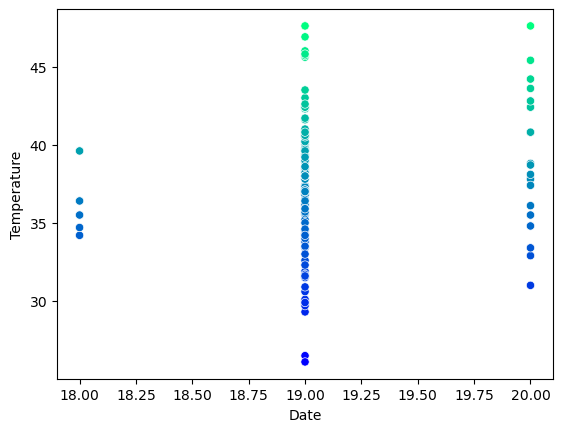

In [151]:
axes = sns.scatterplot(data=nyc, x='Date', y='Temperature',
    ...:      hue='Temperature', palette='winter', legend=False)


In [152]:
axes.set_ylim(10, 70)

(10.0, 70.0)

In [162]:
import numpy as np

In [163]:
x = np.array([min(nyc.Date.values), max(nyc.Date.values)])

In [164]:
y = predict(x)

In [165]:
import matplotlib.pyplot as plt

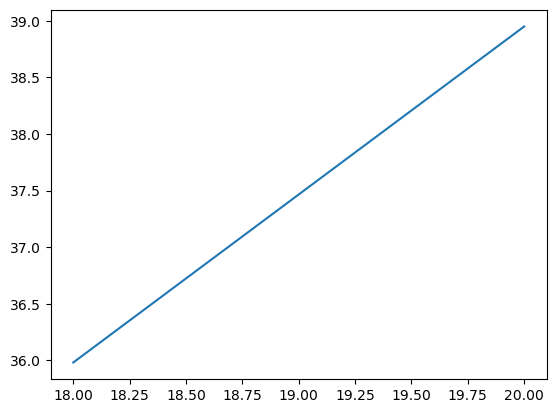

In [166]:
line = plt.plot(x, y)

Samantha Cress